# Groupe 3 : Projet Machine Learning

## Introduction

In [2]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

In [3]:
dataset = pd.read_csv('scitweets_export.tsv', sep='\t')
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


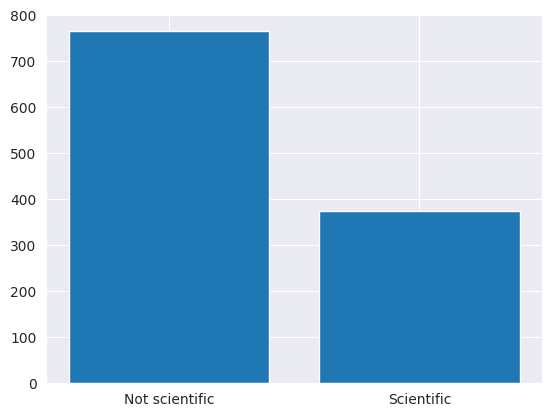

In [4]:
not_scientific = dataset.where(dataset['science_related'] == 0)
scientific = dataset.where(dataset['science_related'] == 1)

fig, ax = plt.subplots()
ax.bar(['Not scientific', 'Scientific'], [not_scientific['tweet_id'].count(), scientific['tweet_id'].count()])
plt.show()

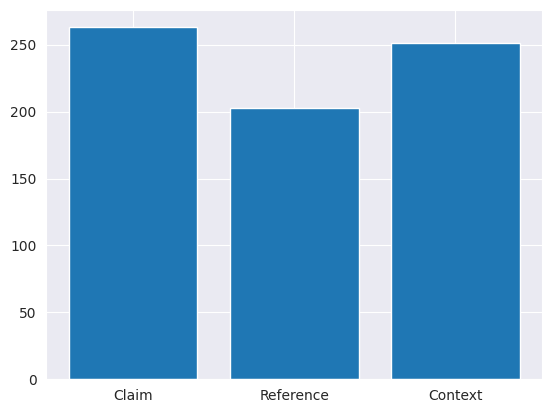

In [5]:
fig, ax = plt.subplots()
ax.bar(['Claim', "Reference", "Context"],
       [scientific.where(scientific['scientific_claim'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_reference'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_context'] == 1)['tweet_id'].count()])
plt.show()

## Prétraitement

On met tout en minuscule

In [6]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower())
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,can any gynecologist with cancer experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,does daily routine help prevent problems with ...,1,1.0,0.0,0.0


### Lemmatization

download the packages

In [7]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/raphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/raphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/raphael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raphael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Remove the stopwords but not the negation words or the words that are important for the sentiment analysis

In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
work_to_keep = ['no', 'not', 'nor', 'too', 'very', 'against', 'but', 'don', 'don\'t', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

for word in work_to_keep:
    stop_words.remove(word)

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the links

In [9]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        if 'http' in word or 'www' in word:
            continue
        new_text.append(word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Transform the emojis into text

In [10]:
import emoji

# Parcourir les indices et modifier directement les valeurs dans le DataFrame
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = emoji.demojize(line['text'])

# Afficher les premières lignes du DataFrame pour vérifier les modifications
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop gym :basketball::fle...,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the non-alphabetic characters except the #

In [11]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        new_word = ""
        for l in word:
            if l.isalpha() or l in ["'",'!'] :
                new_word += l
            else:
                new_word += ' '
        new_text.append(new_word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop gym basketball fle...,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch lock highs lead sleeping couch gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove multiple spaces

In [12]:
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = ' '.join(line['text'].split())

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore guess that's sign recent treadm...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop gym basketball flexe...,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch lock highs lead sleeping couch gotta sto...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


## Vectorisation des textes

(TF-IDF)

## Lemmatization 

In [13]:
# #lemmatization  avec nltk 
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Télécharger les ressources nécessaires (à faire une seule fois)
# nltk.download('punkt')
# nltk.download('wordnet')

# # Initialiser le lemmatiseur
# lemmatizer = WordNetLemmatizer()

# def lemmatize_text_nltk(text):
#     # Tokeniser le texte
#     tokens = word_tokenize(text, language='english')
#     # Lemmatiser chaque token
#     lemmas = [lemmatizer.lemmatize(token) for token in tokens]
#     # Rejoindre les lemmes en une seule chaîne de caractères
#     return ' '.join(lemmas)

# # Appliquer la lemmatisation
# dataset['text_lemmatized'] = dataset['text'].apply(lemmatize_text_nltk)

In [14]:
### import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import contractions
import enchant
from enchant.checker import SpellChecker

# Charger le modèle de langue anglaise de spaCy
nlp = spacy.load('en_core_web_sm')

# Initialiser le correcteur orthographique avec enchant
d = enchant.Dict("en_US")

def correct_spelling(text):
    """Corrige les fautes d'orthographe avec enchant."""
    checker = SpellChecker("en_US")
    checker.set_text(text)
    for error in checker:
        if error.suggest():  # S'il y a des suggestions
            error.replace(error.suggest()[0])  # Remplace par la première suggestion
    return checker.get_text()

def lemmatize_text(text):
    """Pipeline de prétraitement : Correction → Contractions → Lemmatisation."""
    # Étape 1: Correction orthographique
    text = correct_spelling(text)
    
    # Étape 2: Gestion des contractions (ex: "that's" → "that is")
    text = contractions.fix(text)
    
    # Étape 3: Remplacement manuel des 's résiduels (optionnel)
    text = text.replace("'s", " be")
    
    # Étape 4: Lemmatisation avec spaCy
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

# Appliquer la lemmatisation à la colonne 'text'
dataset['text_lemmatized'] = dataset['text'].apply(lemmatize_text)

# Afficher les résultats
print("Avant la lemmatisation :")
print(dataset['text'].head())
print("\nAprès la lemmatisation :")
print(dataset['text_lemmatized'].head())

Avant la lemmatisation :
0    knees bit sore guess that's sign recent treadm...
1    mcdonald's breakfast stop gym basketball flexe...
2    gynecologist cancer experience explain dangers...
3    couch lock highs lead sleeping couch gotta sto...
4    daily routine help prevent problems bipolar di...
Name: text, dtype: object

Après la lemmatisation :
0    knee bit sore guess that be sign recent tread ...
1    McDonald be breakfast stop gym basketball flex...
2    gynecologist cancer experience explain danger ...
3    couch lock high lead sleep couch get to stop shit
4    daily routine help prevent problem bipolar dis...
Name: text_lemmatized, dtype: object


In [15]:
#!pip install contractions
#!pip install pyenchant

#!pip install pyenchant --upgrade


In [16]:
import spacy

nlp = spacy.load('en_core_web_sm')

def advanced_preprocessing(text):
    doc = nlp(text)
    return ' '.join([token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop])

dataset['text_processed'] = dataset['text_lemmatized'].apply(advanced_preprocessing)

print(dataset['text_processed'].head())


0    knee bit sore guess sign recent tread mill wor...
1    mcdonald breakfast stop gym basketball flex bicep
2    gynecologist cancer experience explain danger ...
3           couch lock high lead sleep couch stop shit
4    daily routine help prevent problem bipolar dis...
Name: text_processed, dtype: object


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 1. Division des données
X = dataset['text_processed']
y_binary = dataset['science_related']

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 2. Vectorisation initiale (avec tous les features)
initial_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000000)
X_train_vec = initial_vectorizer.fit_transform(X_train)
X_test_vec = initial_vectorizer.transform(X_test)

# 3. Entraînement RandomForest pour sélection de features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)

# 4. Extraction des 150 features les plus importantes
feature_importances = rf.feature_importances_
feature_names = initial_vectorizer.get_feature_names_out()

# Tri par importance et sélection du top 150
top_indices = np.argsort(feature_importances)[-150:][::-1]
selected_features = feature_names[top_indices]

# 5. Création d'un nouveau vectoriseur avec seulement les features sélectionnées
final_vectorizer = TfidfVectorizer(ngram_range=(1, 2), vocabulary=selected_features)
X_train_final = final_vectorizer.fit_transform(X_train)
X_test_final = final_vectorizer.transform(X_test)

# 6. Ré-entraînement du modèle sur les features sélectionnées
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train_final, y_train)

# 7. Visualisation des top features (optionnel)
important_features = sorted(zip(selected_features, feature_importances[top_indices]), 
                          key=lambda x: x[1], reverse=True)

# plt.figure(figsize=(10, 12))
# plt.barh([x[0] for x in important_features[:20]], 
#          [x[1] for x in important_features[:20]], 
#          color='skyblue')
# plt.gca().invert_yaxis()
# plt.xlabel("Importance")
# plt.title("Top 20 mots les plus discriminants")
# plt.tight_layout()
# plt.show()

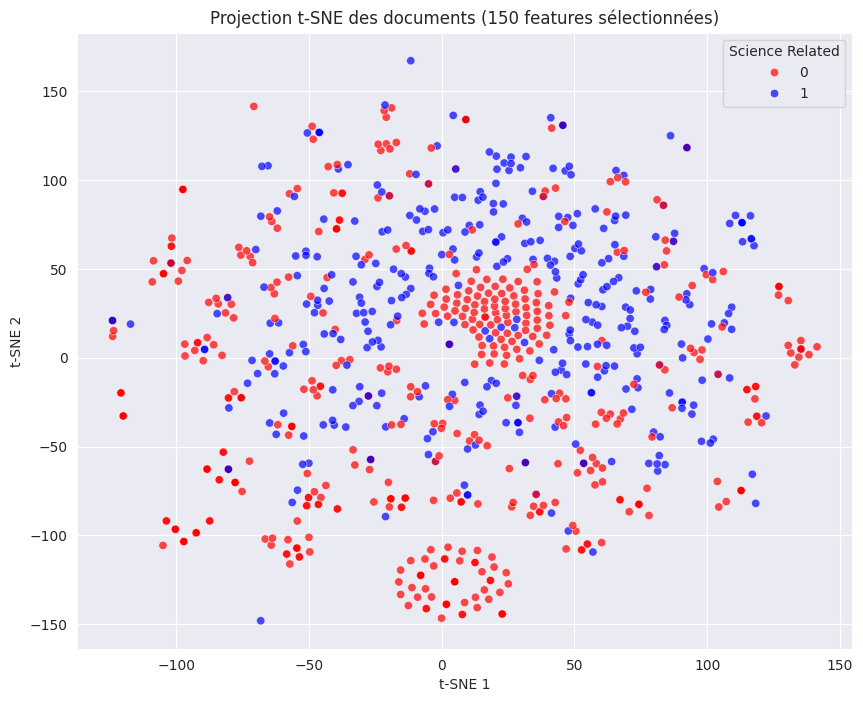

In [18]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 8. Fusion des données pour t-SNE
from scipy.sparse import vstack

X_combined = vstack([X_train_final, X_test_final])  # car TF-IDF donne des matrices "sparse"
y_combined = np.concatenate([y_train, y_test])

# 9. Normalisation
scaler = StandardScaler(with_mean=False)  # with_mean=False car sparse matrix
X_scaled = scaler.fit_transform(X_combined)

# 10. t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled.toarray())  # convertir en dense

# 11. Plot t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_combined, palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title('Projection t-SNE des documents (150 features sélectionnées)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Science Related')
plt.show()


Logistic Regression: Accuracy = 0.8060 ± 0.0211
Random Forest: Accuracy = 0.7956 ± 0.0286
SVM: Accuracy = 0.7875 ± 0.0251

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       152
           1       0.64      0.46      0.54        65

    accuracy                           0.76       217
   macro avg       0.72      0.67      0.69       217
weighted avg       0.75      0.76      0.75       217



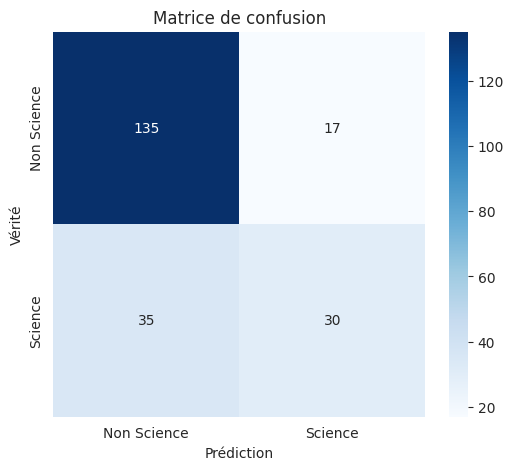

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# === 1. Utilisez les données TF-IDF originales (avant t-SNE) ===
# X_combined et y_combined sont déjà définis dans votre premier code

# === 2. Normalisation ===
scaler = StandardScaler(with_mean=False)  # Gardez with_mean=False pour les matrices creuses
X_scaled = scaler.fit_transform(X_combined)

# === 3. Détection des outliers ===
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(X_scaled.toarray())  # Conversion en dense pour IsolationForest
mask = outlier_pred != -1
X_cleaned, y_cleaned = X_scaled[mask], np.array(y_combined)[mask]

# === 4. Séparation train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
)

# === 5. Test de plusieurs modèles ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True)  # Changé en linear pour éviter les temps longs
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

# === 6. Sélection du meilleur modèle ===
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# === 7. Évaluation ===
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Non Science', 'Science'], 
            yticklabels=['Non Science', 'Science'])
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion")
plt.show()

# === 8. Visualisation t-SNE (seulement pour exploration) ===
# On peut faire une visualisation séparée avec un sous-échantillon pour éviter la surcharge
sample_idx = np.random.choice(X_cleaned.shape[0], 1000, replace=False)
X_sample = X_cleaned[sample_idx].toarray()  # Conversion en dense pour t-SNE
y_sample = y_cleaned[sample_idx]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sample, palette={0: 'red', 1: 'blue'}, alpha=0.7)
# plt.title('Visualisation t-SNE (échantillon de 1000 points)')
# plt.xlabel('t-SNE 1')
# plt.ylabel('t-SNE 2')
# plt.legend(title='Science Related')
# plt.show()

In [20]:
# === 9. Récupération des textes originaux et analyse des erreurs ===

# Supposons que vous avez accès aux textes originaux dans votre dataset
# (remplacez 'text_lemmatized' par la colonne contenant votre texte original si différent)
texts = dataset['text_lemmatized'].values

# Récupérer les indices des échantillons après toutes les transformations
# Nous devons suivre les indices à travers les différentes étapes :

# 1. Indices après suppression des outliers
cleaned_indices = np.where(mask)[0]  # mask vient de la détection d'outliers

# 2. Indices du test set après train_test_split
_, test_indices = train_test_split(
    np.arange(len(cleaned_indices)), 
    test_size=0.2, 
    random_state=42, 
    stratify=y_cleaned
)

# 3. Obtenir les indices originaux correspondant au test set
original_test_indices = cleaned_indices[test_indices]

# 4. Récupérer les textes du test set
X_test_texts = texts[original_test_indices]

# 5. Identifier les erreurs
fp_mask = (y_test == 0) & (y_pred == 1)  # Faux positifs (prédit science mais pas science)
fn_mask = (y_test == 1) & (y_pred == 0)  # Faux négatifs (prédit non science mais science)

fp_texts = X_test_texts[fp_mask]
fn_texts = X_test_texts[fn_mask]

# 6. Afficher les erreurs
print(f"\nNombre total de prédictions: {len(y_test)}")
print(f"Faux positifs (FP): {len(fp_texts)} - {len(fp_texts)/len(y_test):.2%}")
print(f"Faux négatifs (FN): {len(fn_texts)} - {len(fn_texts)/len(y_test):.2%}")

# 7. Afficher des exemples d'erreurs avec leurs probabilités
if len(fp_texts) > 0:
    print("\n=== Exemples de Faux Positifs (prédit Science mais pas Science) ===")
    fp_probs = best_model.predict_proba(X_test[fp_mask])[:, 1]
    for i, (text, prob) in enumerate(zip(fp_texts[:5], fp_probs[:5])):  # 5 premiers
        print(f"\nExemple {i+1} (probabilité Science: {prob:.2f}):\n{text}")

if len(fn_texts) > 0:
    print("\n=== Exemples de Faux Négatifs (prédit Non-Science mais Science) ===")
    fn_probs = best_model.predict_proba(X_test[fn_mask])[:, 1]
    for i, (text, prob) in enumerate(zip(fn_texts[:5], fn_probs[:5])):  # 5 premiers
        print(f"\nExemple {i+1} (probabilité Science: {prob:.2f}):\n{text}")

# 8. Optionnel: Sauvegarder toutes les erreurs pour analyse ultérieure
import pandas as pd
errors_df = pd.DataFrame({
    'text': np.concatenate([fp_texts, fn_texts]),
    'true_label': np.concatenate([y_test[fp_mask], y_test[fn_mask]]),
    'predicted_label': np.concatenate([y_pred[fp_mask], y_pred[fn_mask]]),
    'error_type': ['FP']*len(fp_texts) + ['FN']*len(fn_texts)
})

# Sauvegarde en CSV
errors_df.to_csv('erreurs_classification.csv', index=False)
print("\nLes erreurs ont été sauvegardées dans 'erreurs_classification.csv'")


Nombre total de prédictions: 217
Faux positifs (FP): 17 - 7.83%
Faux négatifs (FN): 35 - 16.13%

=== Exemples de Faux Positifs (prédit Science mais pas Science) ===

Exemple 1 (probabilité Science: 0.84):
dramatic sunhat maybe Mueller hire hr donor because re pub donor refuse part one sided investigation still no look BO hr scandal

Exemple 2 (probabilité Science: 0.64):
new post outline solo mapping activity science perhaps useful subject too

Exemple 3 (probabilité Science: 0.60):
xxx h king xxx local NC rap artist look gain local support follow back would very much appreciated thank

Exemple 4 (probabilité Science: 0.62):
bird will not stop cheep !

Exemple 5 (probabilité Science: 0.77):
mayor country start news conference talk city staff report come one advocate vacant home tax another transit update tweet highlight

=== Exemples de Faux Négatifs (prédit Non-Science mais Science) ===

Exemple 1 (probabilité Science: 0.10):
sybarite trading beginner expert support link ! verunyaasp

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raphael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/raphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/raphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Classification Report for Binary Model (Science Related vs Non-Science):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       147
           1       0.96      0.86      0.90       159

    accuracy                           0.91       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.91      0.91      0.91       306


Cross-Validation Results (k=10):
Accuracy scores for each fold: [0.91503268 0.91503268 0.92810458 0.91503268 0.88888889 0.94117647
 0.91503268 0.93464052 0.92810458 0.93464052]
Mean accuracy: 0.9216
Standard deviation: 0.0143

Original test accuracy: 0.9052


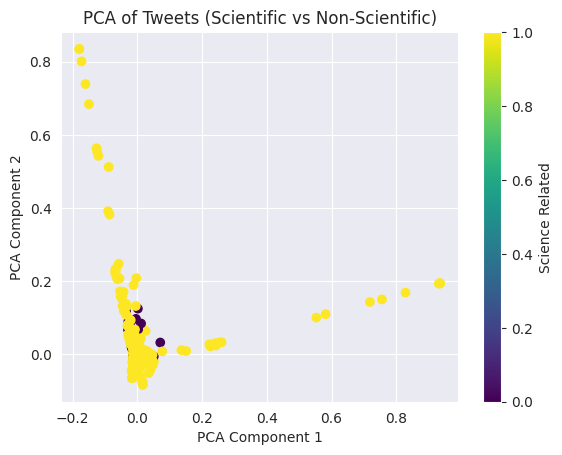

In [21]:
# Importations nécessaires
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, KFold

# Téléchargement des ressources NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Chargement des données depuis un fichier TSV
file_path = 'scitweets_export.tsv'  # Remplacez par le chemin de votre fichier
df = pd.read_csv(file_path, sep='\t')

# Prétraitement du texte
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
#negations = {"not", "no", "nor", "neither", "never", "none"}
#stop_words = stop_words #- negations
stop_words.update(custom_stop_words)

lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    # Supprimer les URLs
    #tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    # Supprimer les mentions (@) et les caractères spéciaux
    tweet = re.sub(r"@\w+|\W", " ", tweet)
    # Convertir en minuscules
    tweet = tweet.lower()
    # Tokenization
    tokens = word_tokenize(tweet)
    # Gestion des négations
    #tokens = [tokens[i] + "_" + tokens[i+1] if tokens[i] in negations else tokens[i] 
    #          for i in range(len(tokens)-1)]
    # Suppression des stop words et lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_tweet)

# Équilibrage des données avec SMOTE
X = df['cleaned_text']
y_binary = df['science_related']

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000)
X_vec = vectorizer.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_vec, y_binary)

# Séparation en train et test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Entraînement du modèle binaire (version originale)
binary_model = LogisticRegression()
binary_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_binary = binary_model.predict(X_test)
print("Classification Report for Binary Model (Science Related vs Non-Science):")
print(classification_report(y_test, y_pred_binary))

# Configuration de la validation croisée
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Création d'une NOUVELLE instance pour la validation croisée
cv_model = LogisticRegression(max_iter=1000)  # Notez le nom différent

# Validation croisée
cv_scores = cross_val_score(cv_model, X_res, y_res, cv=kfold, scoring='accuracy')

print("\nCross-Validation Results (k=10):")
print(f"Accuracy scores for each fold: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Comparaison avec votre résultat initial
print(f"\nOriginal test accuracy: {binary_model.score(X_test, y_test):.4f}")  # Utilisez l'ancien modèle qui a été entraîné


# Visualisation des données avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Tweets (Scientific vs Non-Scientific)')
plt.colorbar(label='Science Related')
plt.show()

In [22]:
# Ajout des model avec lme mem prestraitement que l'agor précident 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Liste des modèles à évaluer (avec leurs hyperparamètres par défaut)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Évaluation de chaque modèle avec la même configuration
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Évaluation de {name}")
    print(f"{'='*50}")
    
    # Entraînement et évaluation sur le jeu de test
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Test Accuracy: {model.score(X_test, y_test):.4f}")
    
    # Validation croisée (identique à votre configuration)
    cv_scores = cross_val_score(model, X_res, y_res, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
    print("\nCross-Validation Results (k=10):")
    print(f"Accuracy scores for each fold: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f}")
    print(f"Standard deviation: {cv_scores.std():.4f}")





Évaluation de Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       147
           1       0.96      0.86      0.90       159

    accuracy                           0.91       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.91      0.91      0.91       306

Test Accuracy: 0.9052

Cross-Validation Results (k=10):
Accuracy scores for each fold: [0.91503268 0.91503268 0.92810458 0.91503268 0.88888889 0.94117647
 0.91503268 0.93464052 0.92810458 0.93464052]
Mean accuracy: 0.9216
Standard deviation: 0.0143

Évaluation de Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       147
           1       0.85      0.96      0.90       159

    accuracy                           0.89       306
   macro avg       0.90      0.89      0.89       306
weighted avg       0.90      0.89      0.8

/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       147
           1       0.98      0.69      0.81       159

    accuracy                           0.83       306
   macro avg       0.86      0.84      0.83       306
weighted avg       0.87      0.83      0.83       306

Test Accuracy: 0.8333

Cross-Validation Results (k=10):
Accuracy scores for each fold: [0.82352941 0.8627451  0.89542484 0.86928105 0.83006536 0.86928105
 0.81699346 0.88888889 0.88235294 0.88888889]
Mean accuracy: 0.8627
Standard deviation: 0.0276

Évaluation de SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       147
           1       1.00      0.70      0.83       159

    accuracy                           0.85       306
   macro avg       0.88      0.85      0.84       306
weighted avg       0.88      0.85      0.84       306

Test Accuracy: 0.8464

Cross-V

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raphael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/raphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/raphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



OPTIMISATION ET ÉVALUATION DE LOGISTIC REGRESSION

Recherche des meilleurs hyperparamètres pour Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Meilleurs paramètres: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       147
           1       0.96      0.90      0.93       159

    accuracy                           0.93       306
   macro avg       0.93      0.93      0.93       306
weighted avg       0.93      0.93      0.93       306

Test Accuracy: 0.9281

Cross-Validation Results (k=10):
Accuracy scores: [0.92810458 0.93464052 0.94771242 0.91503268 0.88235294 0.94771242
 0.92810458 0.94117647 0.94771242 0.95424837]
Mean accuracy: 0.9327 (±0.0203)

OPTIMISATION ET ÉVALUATION DE NAIVE BAYES

Recherche des meilleurs hyperparamètres pour Naive Bayes...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Meilleurs paramètres: {'alpha': 0.1, 'fit_prior': True}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.94   

/tmp/ipykernel_93436/3666931240.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(to_plot.values(), labels=to_plot.keys())


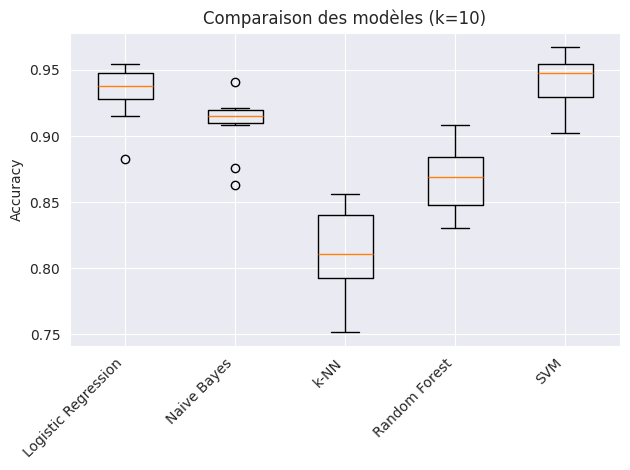

In [34]:
#meme chode que precedent juste ajoute de hyperparmetre 
# Importations nécessaires***************************a garder hi ciaran et raphaelle et dalia  je suis la ************************************
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk
import json

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Chargement des données
file_path = 'scitweets_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Prétraitement du texte (identique à votre version)
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
#negations = {"not", "no", "nor", "neither", "never", "none"}
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tweet = re.sub(r"@\w+|\W", " ", tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_tweet)

# Vectorisation et SMOTE (identique)
X = df['cleaned_text']
y_binary = df['science_related']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000)
X_vec = vectorizer.fit_transform(X)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_vec, y_binary)

# Split train-test (identique)
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Configuration KFold (identique)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionnaire des modèles AVEC leurs hyperparamètres à optimiser
models = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    "Naive Bayes": {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0],
            'fit_prior': [True, False]
        }
    },
    "k-NN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'cosine']
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    "SVM": {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

to_plot = {}
# Évaluation optimisée de chaque modèle
for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"OPTIMISATION ET ÉVALUATION DE {name.upper()}")
    print(f"{'='*60}")
    
    # Optimisation par GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,  # Validation croisée interne pour l'optimisation
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print(f"\nRecherche des meilleurs hyperparamètres pour {name}...")
    grid_search.fit(X_train, y_train)
    
    # Meilleur modèle
    best_model = grid_search.best_estimator_
    print(f"\nMeilleurs paramètres: {grid_search.best_params_}")
    
    # Évaluation sur le test set
    y_pred = best_model.predict(X_test)
    print("\nClassification Report sur le test set:")
    print(classification_report(y_test, y_pred))
    print(f"Test Accuracy: {best_model.score(X_test, y_test):.4f}")
    
    # Validation croisée k=10 avec le meilleur modèle (identique à votre configuration)
    cv_scores = cross_val_score(
        best_model,
        X_res,
        y_res,
        cv=kfold,
        scoring='accuracy'
    )
    
    print("\nCross-Validation Results (k=10):")
    print(f"Accuracy scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    to_plot[name] = [float(x) for x in cv_scores]

with open('model_comparison.json', 'w') as f:
    f.write(json.dumps({"keys": list(to_plot.keys()), "values": list(to_plot.values())}))

plt.boxplot(to_plot.values(), labels=to_plot.keys())
plt.title('Comparaison des modèles (k=10)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('model_comparison1.png', dpi=300)

[nltk_data] Downloading package stopwords to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Features sélectionnées: 200/493

=== TRAITEMENT DU MODÈLE Logistic Regression ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits

Meilleurs paramètres pour Logistic Regression:
{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Temps d'entraînement: 4.23s
Accuracy (test): 0.8627

=== TRAITEMENT DU MODÈLE Random Forest ===
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Meilleurs paramètres pour Random Forest:
{'max_depth': None, 'n_estimators': 100}
Temps d'entraînement: 4.39s
Accuracy (test): 0.8758

=== TRAITEMENT DU MODÈLE XGBoost ===
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Meilleurs paramètres pour XGBoost:
{'learning_rate': 0.1, 'n_estimators': 200}
Temps d'entraînement: 2.93s
Accuracy (test): 0.8333

=== TRAITEMENT DU MODÈLE Naive Bayes ===
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Meilleurs paramètres pour Naive Bayes:
{'alpha': 1.0}
Temps d'entraînement: 0.09s
Accuracy (test): 0.7810

=== TRAITEMENT DU MODÈLE 

<Figure size 1200x800 with 0 Axes>

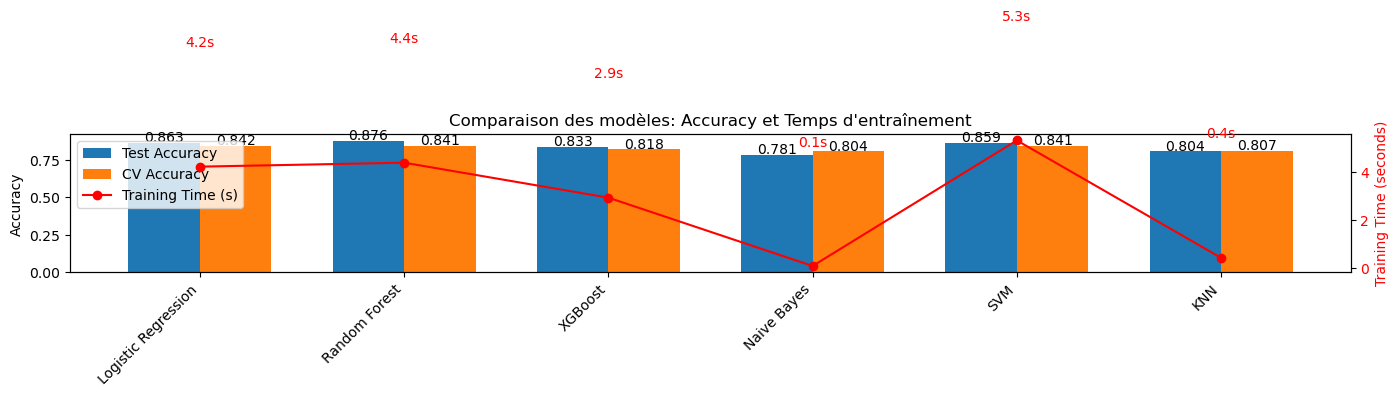

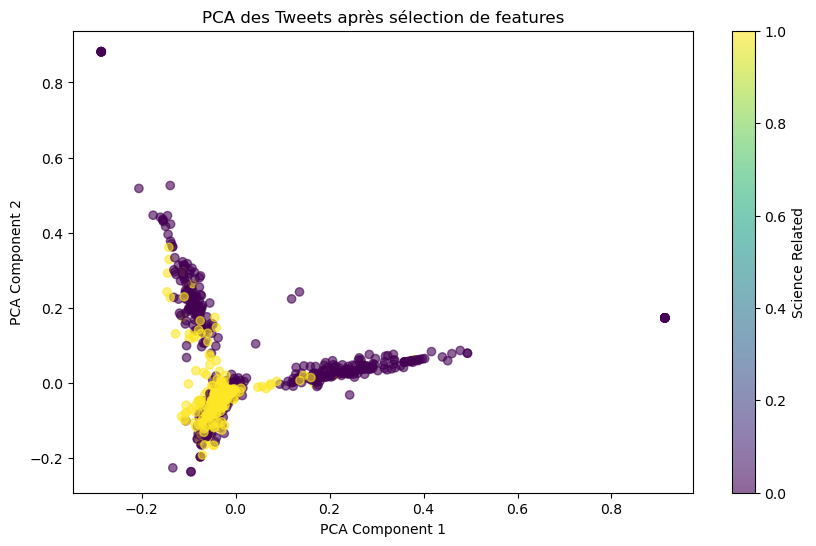

In [7]:
# Importations nécessaires  ***************** this is shit **************************j'ai selectionner les features important sois disnat *******
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import nltk
from time import time

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# 1. Chargement et prétraitement des données
def load_and_preprocess_data(file_path):
    # Chargement des données
    df = pd.read_csv(file_path, sep='\t')
    
    # Prétraitement du texte
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
    #negations = {"not", "no", "nor", "neither", "never", "none"}
    #stop_words = stop_words - negations
    stop_words.update(custom_stop_words)
    lemmatizer = WordNetLemmatizer()

    def preprocess_tweet(tweet):
        tweet = re.sub(r"@\w+|\W", " ", tweet)
        tweet = tweet.lower()
        tokens = word_tokenize(tweet)
       # tokens = [tokens[i] + "_" + tokens[i+1] if tokens[i] in negations and i < len(tokens)-1 else tokens[i] 
       #           for i in range(len(tokens))]
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return " ".join(tokens)

    df['cleaned_text'] = df['text'].apply(preprocess_tweet)
    return df

# 2. Vectorisation et équilibrage
def vectorize_and_balance(df):
    vectorizer = TfidfVectorizer(
        ngram_range=(1, 2),
        max_features=50000,
        min_df=5,
        max_df=0.8
    )
    X = vectorizer.fit_transform(df['cleaned_text'])
    y = df['science_related']
    
    # Équilibrage avec SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res, vectorizer

# 3. Sélection des features
def select_features(X, y, method='rf'):
    if method == 'rf':
        selector = SelectFromModel(
            RandomForestClassifier(n_estimators=100, random_state=42),
            threshold='1.25*median'
        )
    else:  # chi2
        selector = SelectKBest(chi2, k=min(20000, X.shape[1]))
    
    X_selected = selector.fit_transform(X, y)
    print(f"\nFeatures sélectionnées: {X_selected.shape[1]}/{X.shape[1]}")
    return X_selected, selector

# 4. Définition des modèles et paramètres
def get_models():
    return {
        "Logistic Regression": {
            "model": LogisticRegression(max_iter=1000, random_state=42),
            "params": {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
         },
        "Random Forest": {
            "model": RandomForestClassifier(random_state=42, n_jobs=-1),
            "params": {'n_estimators': [100, 200], 'max_depth': [None, 10, 30]}
        },
        "XGBoost": {
            "model": XGBClassifier(random_state=42, n_jobs=-1),
            "params": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
        },
        "Naive Bayes": {
            "model": MultinomialNB(),
            "params": {'alpha': [0.1, 0.5, 1.0]}
        },
        "SVM": {
            "model": Pipeline([
                ('scaler', StandardScaler(with_mean=False)),
                ('svm', SVC(kernel='linear', random_state=42))
            ]),
            "params": {'svm__C': [0.1, 1, 10]}
        },
        "KNN": {
            "model": KNeighborsClassifier(n_jobs=-1),
            "params": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
        }
    }

# 5. Entraînement et évaluation
def train_and_evaluate(models, X_train, y_train, X_test, y_test, X_full, y_full):
    results = {}
    for name, config in models.items():
        start_time = time()
        print(f"\n=== TRAITEMENT DU MODÈLE {name} ===")
        
        # Optimisation des hyperparamètres
        grid = GridSearchCV(
            estimator=config["model"],
            param_grid=config["params"],
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        
        # Évaluation
        y_pred = best_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Validation croisée
        cv_scores = cross_val_score(
            best_model, 
            X_full, 
            y_full, 
            cv=KFold(n_splits=10, shuffle=True, random_state=42),
            scoring='accuracy',
            n_jobs=-1
        )
        
        results[name] = {
            'accuracy': acc,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'report': report,
            'best_params': grid.best_params_,
            'training_time': time() - start_time
        }
        
        print(f"\nMeilleurs paramètres pour {name}:")
        print(grid.best_params_)
        print(f"Temps d'entraînement: {results[name]['training_time']:.2f}s")
        print(f"Accuracy (test): {acc:.4f}")
    
    return results

# 6. Visualisation des résultats
def visualize_results(results):
    plt.figure(figsize=(12, 8))
    
    models = list(results.keys())
    test_acc = [results[m]['accuracy'] for m in models]
    cv_acc = [results[m]['cv_mean'] for m in models]
    training_times = [results[m]['training_time'] for m in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx()
    
    bars1 = ax1.bar(x - width/2, test_acc, width, label='Test Accuracy')
    bars2 = ax1.bar(x + width/2, cv_acc, width, label='CV Accuracy')
    line = ax2.plot(x, training_times, 'r-', marker='o', label='Training Time (s)')
    
    for i, v in enumerate(test_acc):
        ax1.text(i - width/2, v + 0.01, f"{v:.3f}", ha='center')
    for i, v in enumerate(cv_acc):
        ax1.text(i + width/2, v + 0.01, f"{v:.3f}", ha='center')
    for i, v in enumerate(training_times):
        ax2.text(i, v + 5, f"{v:.1f}s", ha='center', color='red')
    
    ax1.set_ylabel('Accuracy')
    ax2.set_ylabel('Training Time (seconds)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, rotation=45, ha='right')
    ax1.set_title('Comparaison des modèles: Accuracy et Temps d\'entraînement')
    
    lines = [bars1, bars2] + line
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')
    
    plt.tight_layout()
    plt.show()

# 7. Visualisation PCA
def visualize_pca(X, y):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA des Tweets après sélection de features')
    plt.colorbar(label='Science Related')
    plt.show()

# Exécution principale
def main():
    # 1. Chargement et prétraitement
    file_path = 'scitweets_export.tsv'
    df = load_and_preprocess_data(file_path)
    
    # 2. Vectorisation et équilibrage
    X_res, y_res, vectorizer = vectorize_and_balance(df)
    
    # 3. Sélection des features
    X_selected, selector = select_features(X_res, y_res, method='rf')
    
    # 4. Séparation train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y_res, test_size=0.2, random_state=42
    )
    
    # 5. Définition des modèles
    models = get_models()
    
    # 6. Entraînement et évaluation
    results = train_and_evaluate(models, X_train, y_train, X_test, y_test, X_selected, y_res)
    
    # 7. Affichage des résultats
    print("\n\n=== RÉSULTATS FINAUX ===")
    for model_name, metrics in results.items():
        print(f"\nModèle: {model_name}")
        print(f"Accuracy (test): {metrics['accuracy']:.4f}")
        print(f"CV Accuracy (mean±std): {metrics['cv_mean']:.4f} ± {metrics['cv_std']:.4f}")
        print(f"Temps d'entraînement: {metrics['training_time']:.2f}s")
        print("\nRapport de classification:")
        print(metrics['report'])
    
    # 8. Visualisations
    visualize_results(results)
    visualize_pca(X_selected, y_res)

if __name__ == "__main__":
    main()